In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import linregress


In [2]:
#Hypothesis: Purchases over $50 are always shipped via Express shipping. 

In [3]:
#Reading CSV 
shopping_df = pd.read_csv("shopping_behavior_updated.csv")


In [4]:
#Showing CSV file
shopping_df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [5]:
#Identifying Number of Unique Shipping Types
shipping_type = len(shopping_df["Shipping Type"].unique())
print(shipping_type)


6


In [6]:
#Identifying Number of Unique Purchased Amounts
purchased_amount = len(shopping_df["Purchase Amount (USD)"].unique())
print(purchased_amount)


81


In [7]:
#Grouping Shipping Types
express = shopping_df[shopping_df["Shipping Type"] == "Express"]["Purchase Amount (USD)"]


In [8]:
#Grouping Shipping Types
standard = shopping_df[shopping_df["Shipping Type"] == "Standard"]["Purchase Amount (USD)"]


In [9]:
#Grouping Shipping Types into 1 Column
shopping_df["Shipping Category"] = shopping_df["Shipping Type"].apply(lambda x: "express" if x in ["Express", "Next Day Air", "2-Day Shipping"] else "standard")
shopping_df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Shipping Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,express
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,express
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,standard
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,express
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,express
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,standard
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,standard
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,express


In [10]:
data = shopping_df.groupby(["Purchase Amount (USD)"])["Purchase Amount (USD)"].count()
print(data)


Purchase Amount (USD)
20     52
21     46
22     44
23     57
24     50
       ..
96     53
97     55
98     52
99     52
100    36
Name: Purchase Amount (USD), Length: 81, dtype: int64


Shipping Category
express     1921
standard    1979
Name: Shipping Category, dtype: int64


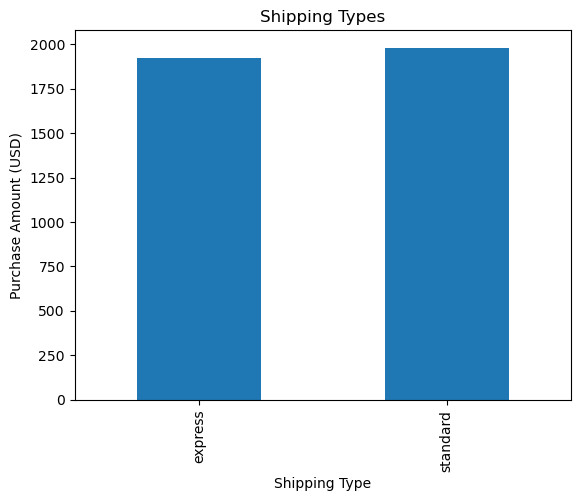

In [11]:
data1 = shopping_df.groupby(["Shipping Category"])["Shipping Category"].count()
print(data1)
data1.plot.bar()
plt.xlabel("Shipping Type")
plt.ylabel("Purchase Amount (USD)")
plt.title ("Shipping Types")
plt.savefig("bar")


In [12]:
shopping_df["Shipping Category"] = shopping_df["Shipping Type"].apply(lambda x: "express" if x in ["Express", "Next Day Air", "2-Day Shipping"] else "standard")
shopping_df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Shipping Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,express
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,express
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,standard
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,express
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,express
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,standard
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,standard
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,express


In [13]:
#Converting Purchase Amount from String to Integer
shopping_df["Purchase Amount (USD)"] = shopping_df["Purchase Amount (USD)"].astype(float)


In [14]:
#List of Purchase Amount less than 50
lessthan = shopping_df[shopping_df["Purchase Amount (USD)"] < 50]
lessthan


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Shipping Category
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,standard
5,6,46,Male,Sneakers,Footwear,20.0,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,standard
7,8,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,standard
9,10,57,Male,Handbag,Accessories,31.0,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,express
10,11,53,Male,Shoes,Footwear,34.0,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,3888,40,Female,Shirt,Clothing,34.0,Kansas,M,Charcoal,Spring,2.7,No,Express,No,No,1,Credit Card,Quarterly,express
3891,3892,36,Female,Dress,Clothing,30.0,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly,standard
3895,3896,40,Female,Hoodie,Clothing,28.0,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,express
3896,3897,52,Female,Backpack,Accessories,49.0,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,standard


In [15]:
#List of Purchase Amount greater than 50
greaterthan = shopping_df[shopping_df["Purchase Amount (USD)"] > 50]
greaterthan


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Shipping Category
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,express
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,express
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,standard
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,express
6,7,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,3893,35,Female,Jewelry,Accessories,86.0,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly,standard
3893,3894,21,Female,Hat,Accessories,64.0,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly,standard
3894,3895,66,Female,Skirt,Clothing,78.0,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months,express
3898,3899,44,Female,Shoes,Footwear,77.0,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,express


In [16]:
#Mean of all Purchase Amounts
shopping_df["Purchase Amount (USD)"].mean()


59.76435897435898

In [17]:
#Mean of Purchase Amount greater than 50
shopping_df[shopping_df["Purchase Amount (USD)"] > 50].mean()


/var/folders/sb/twjs3g_15r9f782xfrnqtndh0000gn/T/ipykernel_66821/2301024701.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  shopping_df[shopping_df["Purchase Amount (USD)"] > 50].mean()


Customer ID              1960.817687
Age                        43.811400
Purchase Amount (USD)      75.736798
Review Rating               3.771333
Previous Purchases         25.462280
dtype: float64

In [18]:
#Mean of Purchase Amount less than 50
shopping_df[shopping_df["Purchase Amount (USD)"] < 50].mean()


/var/folders/sb/twjs3g_15r9f782xfrnqtndh0000gn/T/ipykernel_66821/2662117142.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  shopping_df[shopping_df["Purchase Amount (USD)"] < 50].mean()


Customer ID              1933.014325
Age                        44.450887
Purchase Amount (USD)      34.087995
Review Rating               3.719441
Previous Purchases         25.203956
dtype: float64

In [19]:
ttest_ind(express,standard)


Ttest_indResult(statistic=1.5108011258870513, pvalue=0.1310825232568484)

In [20]:
data = shopping_df.groupby(["Shipping Type"])["Shipping Type"].count()
print(data)


Shipping Type
2-Day Shipping    627
Express           646
Free Shipping     675
Next Day Air      648
Standard          654
Store Pickup      650
Name: Shipping Type, dtype: int64


In [21]:
data1 = shopping_df.groupby(["Purchase Amount (USD)"])["Shipping Type"].count()
print(data1)


Purchase Amount (USD)
20.0     52
21.0     46
22.0     44
23.0     57
24.0     50
         ..
96.0     53
97.0     55
98.0     52
99.0     52
100.0    36
Name: Shipping Type, Length: 81, dtype: int64
